# 📊 Análisis Exploratorio - Dataset Actual (Arreglo_3_actual.csv)

Este notebook analiza el dataset más simple con 37 columnas que incluye:
- **14 variables geométricas y estructurales**
- **20 características de vibración** (10 de S1 + 10 de S2)
- **3 columnas de etiquetas** en formato one-hot que convertiremos a una sola

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Configuración de estilo para gráficos más bonitos
plt.style.use('default')
sns.set_palette("husl")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📊 Librerías cargadas para análisis exploratorio")

📊 Librerías cargadas para análisis exploratorio


In [2]:
# Cargar el dataset actual
df = pd.read_csv('../data/Arreglo_3_actual.csv')

print(f"📊 ANÁLISIS EXPLORATORIO - DATASET ACTUAL")
print("=" * 60)
print(f"📈 Datos cargados: {df.shape[0]} filas × {df.shape[1]} columnas")

# Mostrar información básica
print(f"\n📋 ESTRUCTURA DEL DATASET:")
print(f"   • Variables geométricas: ~14 columnas")
print(f"   • Características S1: ~10 columnas") 
print(f"   • Características S2: ~10 columnas")
print(f"   • Etiquetas one-hot: 3 columnas (Nivel_Dano_N1, N2, N3)")

# Mostrar primeras columnas
print(f"\n🔍 PRIMERAS 5 COLUMNAS:")
print(df.head(3).iloc[:, :5])

📊 ANÁLISIS EXPLORATORIO - DATASET ACTUAL
📈 Datos cargados: 2234 filas × 37 columnas

📋 ESTRUCTURA DEL DATASET:
   • Variables geométricas: ~14 columnas
   • Características S1: ~10 columnas
   • Características S2: ~10 columnas
   • Etiquetas one-hot: 3 columnas (Nivel_Dano_N1, N2, N3)

🔍 PRIMERAS 5 COLUMNAS:
   #  Do_mm   Ht_mm  Di_mm     S1
0  0  850.9  407.64  165.1  25.59
1  1  850.9  407.64  165.1  25.59
2  2  850.9  407.64  165.1  25.59


## 📋 Resumen General del Dataset

In [3]:
# Convertir etiquetas one-hot a categórica
print("🔄 CONVERSIÓN DE ETIQUETAS ONE-HOT")
print("=" * 40)

# Verificar formato one-hot
nivel_cols = ['Nivel_Dano_N1', 'Nivel_Dano_N2', 'Nivel_Dano_N3']
print("📊 Estado actual de las etiquetas:")
for col in nivel_cols:
    count_ones = (df[col] == 1).sum()
    print(f"   • {col}: {count_ones:,} muestras con valor 1")

# Verificar que cada fila tenga exactamente un 1
row_sums = df[nivel_cols].sum(axis=1)
print(f"\n🔍 Verificación one-hot:")
print(f"   • Filas con exactamente un 1: {(row_sums == 1).sum():,}")
print(f"   • Filas con más de un 1: {(row_sums > 1).sum()}")
print(f"   • Filas con cero 1s: {(row_sums == 0).sum()}")

# Convertir one-hot a categórica
def onehot_to_categorical(row):
    if row['Nivel_Dano_N1'] == 1:
        return 'N1'
    elif row['Nivel_Dano_N2'] == 1:
        return 'N2'
    elif row['Nivel_Dano_N3'] == 1:
        return 'N3'
    else:
        return 'Unknown'

# Aplicar conversión
df['Nivel_Dano'] = df.apply(onehot_to_categorical, axis=1)

print(f"\n✅ Conversión completada!")
print(f"📊 Nueva distribución de Nivel_Dano:")
nivel_counts = df['Nivel_Dano'].value_counts().sort_index()
for nivel, count in nivel_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   • {nivel}: {count:,} muestras ({percentage:.1f}%)")

# Remover columnas one-hot originales y crear dataset limpio
df_clean = df.drop(columns=nivel_cols)
print(f"\n🧹 Dataset limpio: {df_clean.shape[0]} filas × {df_clean.shape[1]} columnas")

🔄 CONVERSIÓN DE ETIQUETAS ONE-HOT
📊 Estado actual de las etiquetas:
   • Nivel_Dano_N1: 1,177 muestras con valor 1
   • Nivel_Dano_N2: 801 muestras con valor 1
   • Nivel_Dano_N3: 256 muestras con valor 1

🔍 Verificación one-hot:
   • Filas con exactamente un 1: 2,234
   • Filas con más de un 1: 0
   • Filas con cero 1s: 0

✅ Conversión completada!
📊 Nueva distribución de Nivel_Dano:
   • N1: 1,177 muestras (52.7%)
   • N2: 801 muestras (35.9%)
   • N3: 256 muestras (11.5%)

🧹 Dataset limpio: 2234 filas × 35 columnas


In [4]:
# Resumen general del dataset limpio
print(f"📋 RESUMEN GENERAL DEL DATASET LIMPIO")
print("-" * 50)

# Información básica
print(f"Dimensiones: {df_clean.shape[0]:,} filas × {df_clean.shape[1]} columnas")
print(f"Memoria utilizada: {df_clean.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Tipos de variables
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns

print(f"\nTipos de variables:")
print(f"   • Numéricas: {len(numeric_cols)} ({len(numeric_cols)/(len(df_clean.columns))*100:.1f}%)")
print(f"   • Categóricas: {len(categorical_cols)} ({len(categorical_cols)/(len(df_clean.columns))*100:.1f}%)")

# Clasificar variables numéricas
geom_cols = [col for col in numeric_cols if any(x in col for x in ['Do_mm', 'Ht_mm', 'Di_mm', 'S1', 'S2', 'T_st', 'Fy_', 'E_', 'G_', 'τy_', 'K'])]
s1_cols = [col for col in numeric_cols if col.startswith('S1_')]
s2_cols = [col for col in numeric_cols if col.startswith('S2_')]

print(f"\nClasificación de variables numéricas:")
print(f"   • Variables geométricas/estructurales: {len(geom_cols)}")
print(f"   • Características S1 (sótano 1): {len(s1_cols)}")
print(f"   • Características S2 (sótano 2): {len(s2_cols)}")

# Valores faltantes
missing_total = df_clean.isnull().sum().sum()
print(f"\nValores faltantes: {missing_total:,} ({missing_total/(df_clean.shape[0]*df_clean.shape[1])*100:.2f}%)")

# Variable objetivo
print(f"\n🎯 VARIABLE OBJETIVO (Nivel_Dano):")
objetivo_counts = df_clean['Nivel_Dano'].value_counts().sort_index()
total_muestras = len(df_clean)

for nivel, count in objetivo_counts.items():
    percentage = (count / total_muestras) * 100
    print(f"   • {nivel}: {count:,} muestras ({percentage:.1f}%)")

balance_ratio = objetivo_counts.max() / objetivo_counts.min()
print(f"\nRatio de desbalance: {balance_ratio:.2f}:1")

📋 RESUMEN GENERAL DEL DATASET LIMPIO
--------------------------------------------------
Dimensiones: 2,234 filas × 35 columnas
Memoria utilizada: 0.7 MB

Tipos de variables:
   • Numéricas: 34 (97.1%)
   • Categóricas: 1 (2.9%)

Clasificación de variables numéricas:
   • Variables geométricas/estructurales: 33
   • Características S1 (sótano 1): 10
   • Características S2 (sótano 2): 10

Valores faltantes: 0 (0.00%)

🎯 VARIABLE OBJETIVO (Nivel_Dano):
   • N1: 1,177 muestras (52.7%)
   • N2: 801 muestras (35.9%)
   • N3: 256 muestras (11.5%)

Ratio de desbalance: 4.60:1


## 📈 Visualizaciones con SEABORN

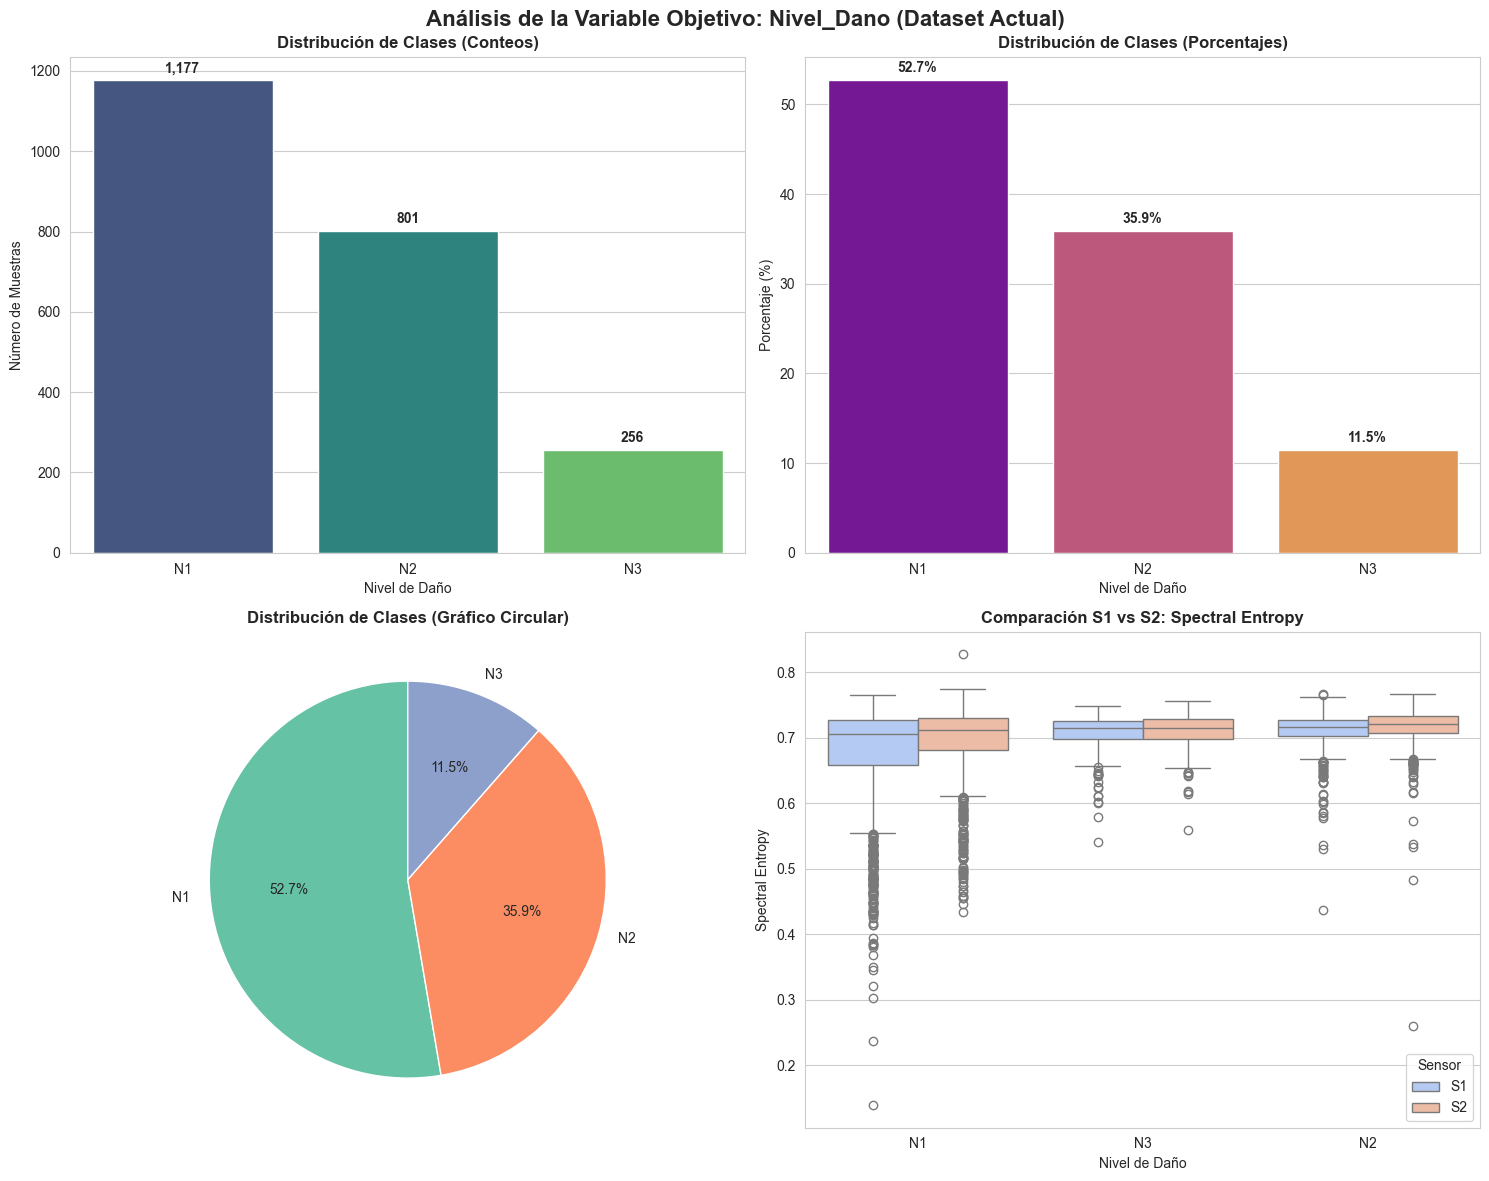


⚖️  EVALUACIÓN DE BALANCE:
   • Clase mayoritaria: 52.7%
   • Clase minoritaria: 11.5%
   • Ratio de desbalance: 4.60:1
   • Estado: 🔴 DESBALANCEADO


In [5]:
# Crear visualizaciones del dataset actual
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis de la Variable Objetivo: Nivel_Dano (Dataset Actual)', fontsize=16, fontweight='bold')

# Preparar datos para gráficos
objetivo_data = pd.DataFrame({
    'Clase': list(objetivo_counts.index),
    'Cantidad': list(objetivo_counts.values)
})

objetivo_props = (objetivo_counts / total_muestras) * 100
props_data = pd.DataFrame({
    'Clase': list(objetivo_props.index),
    'Porcentaje': list(objetivo_props.values)
})

# 1. Gráfico de barras con conteos
sns.barplot(data=objetivo_data, x='Clase', y='Cantidad', ax=axes[0,0], 
            hue='Clase', palette='viridis', legend=False)
axes[0,0].set_title('Distribución de Clases (Conteos)', fontweight='bold')
axes[0,0].set_xlabel('Nivel de Daño')
axes[0,0].set_ylabel('Número de Muestras')

# Agregar etiquetas
for i, v in enumerate(objetivo_data['Cantidad']):
    axes[0,0].text(i, v + max(objetivo_data['Cantidad']) * 0.01, f'{v:,}', 
                   ha='center', va='bottom', fontweight='bold')

# 2. Gráfico de barras con porcentajes
sns.barplot(data=props_data, x='Clase', y='Porcentaje', ax=axes[0,1], 
            hue='Clase', palette='plasma', legend=False)
axes[0,1].set_title('Distribución de Clases (Porcentajes)', fontweight='bold')
axes[0,1].set_xlabel('Nivel de Daño')
axes[0,1].set_ylabel('Porcentaje (%)')

# Agregar etiquetas
for i, v in enumerate(props_data['Porcentaje']):
    axes[0,1].text(i, v + max(props_data['Porcentaje']) * 0.01, f'{v:.1f}%', 
                   ha='center', va='bottom', fontweight='bold')

# 3. Gráfico circular
colors = sns.color_palette('Set2', len(objetivo_counts))
axes[1,0].pie(objetivo_counts.values, labels=objetivo_counts.index, autopct='%1.1f%%',
              colors=colors, startangle=90)
axes[1,0].set_title('Distribución de Clases (Gráfico Circular)', fontweight='bold')

# 4. Comparación características S1 vs S2
# Usar una característica común entre S1 y S2
if len(s1_cols) > 0 and len(s2_cols) > 0:
    # Buscar características similares
    s1_sample = 'S1_Spectral entropy'
    s2_sample = 'S2_Spectral entropy'
    
    if s1_sample in df_clean.columns and s2_sample in df_clean.columns:
        # Crear dataset para comparación
        comparison_data = pd.DataFrame({
            'Nivel_Dano': list(df_clean['Nivel_Dano']) * 2,
            'Valor': list(df_clean[s1_sample]) + list(df_clean[s2_sample]),
            'Sensor': ['S1'] * len(df_clean) + ['S2'] * len(df_clean)
        })
        
        sns.boxplot(data=comparison_data, x='Nivel_Dano', y='Valor', 
                   hue='Sensor', ax=axes[1,1], palette='coolwarm')
        axes[1,1].set_title('Comparación S1 vs S2: Spectral Entropy', fontweight='bold')
        axes[1,1].set_xlabel('Nivel de Daño')
        axes[1,1].set_ylabel('Spectral Entropy')
    else:
        # Si no existe esa característica, usar la primera disponible de cada sensor
        s1_col = s1_cols[0] if s1_cols else None
        
        if s1_col:
            sns.boxplot(data=df_clean, x='Nivel_Dano', y=s1_col, ax=axes[1,1], palette='coolwarm')
            axes[1,1].set_title(f'Distribución por Nivel de Daño: {s1_col}', fontweight='bold')
        else:
            axes[1,1].text(0.5, 0.5, 'No hay características S1/S2 disponibles', 
                          ha='center', va='center', transform=axes[1,1].transAxes)
            axes[1,1].set_title('Sin características de sensores', fontweight='bold')

plt.tight_layout()
plt.show()

# Mostrar estadísticas de balance
balance_status = "🟢 BALANCEADO" if balance_ratio <= 1.5 else ("🟡 LIGERAMENTE DESBALANCEADO" if balance_ratio <= 3.0 else "🔴 DESBALANCEADO")
print(f"\n⚖️  EVALUACIÓN DE BALANCE:")
print(f"   • Clase mayoritaria: {objetivo_counts.max()/total_muestras*100:.1f}%")
print(f"   • Clase minoritaria: {objetivo_counts.min()/total_muestras*100:.1f}%")
print(f"   • Ratio de desbalance: {balance_ratio:.2f}:1")
print(f"   • Estado: {balance_status}")

In [6]:
# Guardar dataset limpio con etiqueta convertida
print("💾 GUARDANDO DATASET LIMPIO")
print("=" * 35)

output_path = '../data/Arreglo_3_actual_clean.csv'
df_clean.to_csv(output_path, index=False)

print(f"✅ Dataset limpio guardado en: {output_path}")
print(f"📊 Dimensiones finales: {df_clean.shape}")

# Mostrar muestra de las columnas finales
print(f"\n🔍 MUESTRA DEL DATASET LIMPIO:")
print("Últimas 3 columnas (incluyendo Nivel_Dano):")
print(df_clean.iloc[:5, -3:])

💾 GUARDANDO DATASET LIMPIO
✅ Dataset limpio guardado en: ../data/Arreglo_3_actual_clean.csv
📊 Dimensiones finales: (2234, 35)

🔍 MUESTRA DEL DATASET LIMPIO:
Últimas 3 columnas (incluyendo Nivel_Dano):
   S2_Spectral roll-on  S2_Power bandwidth Nivel_Dano
0                  6.7                10.0         N1
1                  6.6                 9.9         N1
2                  6.6                 9.2         N1
3                  6.3                 8.2         N1
4                  6.1                10.7         N1


## 📊 Conclusiones del Análisis - Dataset Actual

### **📈 Comparación con Dataset Final:**
- **Dataset Actual:** 2,234 muestras × **34 variables** (vs 327 en el final)
- **Estructura más simple:** Variables geométricas + características S1/S2
- **Mismo desbalance:** Ratio 4.60:1 (idéntico al dataset completo)

### **🎯 Variable Objetivo (Nivel_Dano)**
- **3 clases:** N1, N2, N3 (convertidas desde formato one-hot)
- **Estado:** 🔴 **DESBALANCEADO** (ratio 4.60:1)
- **Distribución idéntica:** N1 (52.7%), N2 (35.9%), N3 (11.5%)

### **🔧 Ventajas del Dataset Actual:**
- **Más manejable:** 34 vs 327 variables
- **Interpretable:** Variables con significado físico claro
- **Dual sensor:** Información de S1 y S2 por separado
- **Base sólida:** Para entender las características fundamentales

### **📈 Próximos Pasos:**
1. **Oversampling:** Aplicar SMOTE a este dataset más simple
2. **Análisis de correlación:** Entre características S1 y S2
3. **Modelado inicial:** Como baseline antes del dataset completo